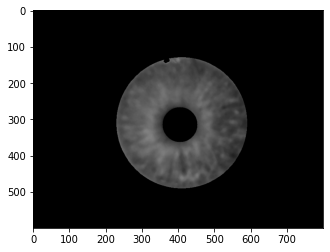

In [84]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, segmentation

#Importa img
img = cv2.imread('iris.jpg',0)[200:800, 200: 1000]
img = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

#Encontrar Iris
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,200,param1=80,param2=30,minRadius=150,maxRadius=250)

#Desenhar círculo ao redor da Iris
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
  cv2.circle(cimg,(i[0],i[1]),i[2],(255,0,0),10)

segments = segmentation.slic(cimg, 3)
segment = cimg.copy()
segment[segments!=2] = 0

#Encontrar centro da Iris
imgT = cv2.cvtColor(segment,cv2.COLOR_BGR2GRAY)
circles = cv2.HoughCircles(imgT,cv2.HOUGH_GRADIENT,30,500,param1=20,param2=100,maxRadius=100)

#Preencher centro da Iris de preto
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
  preto = (0, 0, 0)
  cv2.circle(segment,(i[0],i[1]),i[2],preto,-1)

pupil_segments = segmentation.slic(segment,2)
pupil = segment.copy()
pupil[pupil_segments!=0] = (255)

#Print imagem
plt.figure()
plt.imshow(pupil)